#CHALLENGE: Telecom X, Análisis de evasión de clientes.

#📌 Extracción

In [124]:
#Importación de bibliotecas
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [125]:
#Carga de la tabla con datos
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

##Diccionario de datos
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [126]:
#Información de filas y columnas
df.shape

(7267, 6)

In [127]:
#Información de encabezados de la tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [128]:
#Normalización de la tabla
from pandas import json_normalize
df_normalizado = pd.json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [129]:
#Encabezado de tabla normalizada
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [130]:
# Verificación de valores únicos
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 20:
    print(df_normalizado[col].unique())
    print(' ' * 50)

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
                                                  
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
                                                  
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
                                                  
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
                                                  
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
                                                  
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
                                                  
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
                                                  
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [131]:
#Verificación de valores en blanco o vacíos
blancos_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
blancos_vacios

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [132]:
#Valores nulos
print("Valores nulos:", df_normalizado.isnull().sum())

Valores nulos: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [133]:
# Valores duplicados
print("Lineas duplicadas:", df_normalizado.duplicated().sum())

Lineas duplicadas: 0


In [134]:
#Eliminación de columnas Churn vacías
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']

In [135]:
#Cambio de tipo columna account.Charges.Total
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

In [136]:
#Verificación de cambio a Float
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [137]:
#Verificación de blancos o vacíos
blancos_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
blancos_vacios

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [138]:
#Cambio de nombres de columnas
df_normalizado.rename(columns={
    "customerID": "customerID",
    "Churn": "Churn",
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "Charges.Monthly",
    "account.Charges.Total": "Charges.Total"
}, inplace=True)

In [139]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [140]:
#Creación de columna Cuentas diarias
df_normalizado["Cuentas_Diarias"] = (df_normalizado["Charges.Monthly"] / 30).round(3)

In [141]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.187
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.997
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.797


In [142]:
df_normalizado['Cuentas_Diarias'].dtype

dtype('float64')

In [143]:
#Exportar df_normalizado a CSV
df_normalizado.to_csv("TelecomX_normalizado", index=False)
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.187
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.997
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.267
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.837
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.677
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.262


#📊 Carga y análisis

In [144]:
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158727
std,0.368612,24.559481,30.090047,2266.771362,1.003005
min,0.000000,0.000000,18.250000,18.800000,0.608000
25%,0.000000,9.000000,35.500000,401.450000,1.183000
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958000


In [145]:
#Cantidad de cancelaciones de servicios
churn=df_normalizado['Churn'].value_counts()
churn


,count
Churn,
No,5174
Yes,1869


In [146]:
#Proporción de cancelaciones de servicios
df_normalizado["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


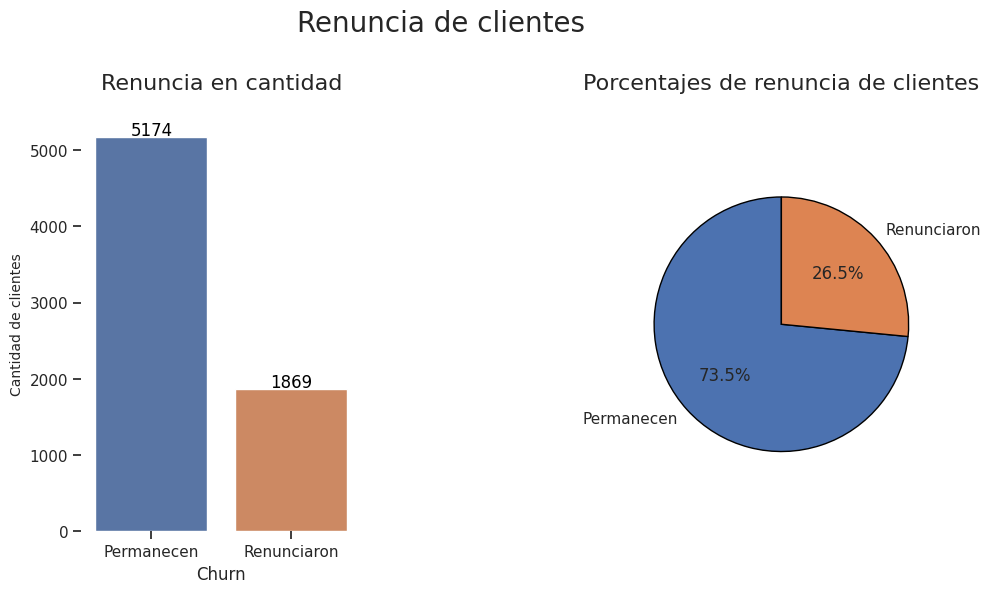

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(top=0.8, left=0.2, wspace=1)
fig.suptitle('Renuncia de clientes', fontsize=20)

sns.barplot(x=churn.index,y=churn.values,hue=churn.index,ax=ax[0],legend=False)
ax[0].set_title('Renuncia en cantidad', loc='center', fontsize=16,pad=20)
ax[0].set_xticks([0,1],labels=['Permanecen','Renunciaron'])
ax[0].set_ylabel('Cantidad de clientes', fontsize=10)
ax[0].set_frame_on(False)

for i,j in enumerate(churn.values):
    ax[0].text(i,j+20,str(j),color='black',fontsize=12,ha='center')

ax[1].pie(churn, labels=('Permanecen','Renunciaron'), autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax[1].set_title('Porcentajes de renuncia de clientes', fontsize=16,pad=20)
ax[1].axis('equal')

plt.savefig('renuncia_clientes.png', bbox_inches='tight', dpi=300)

plt.show()

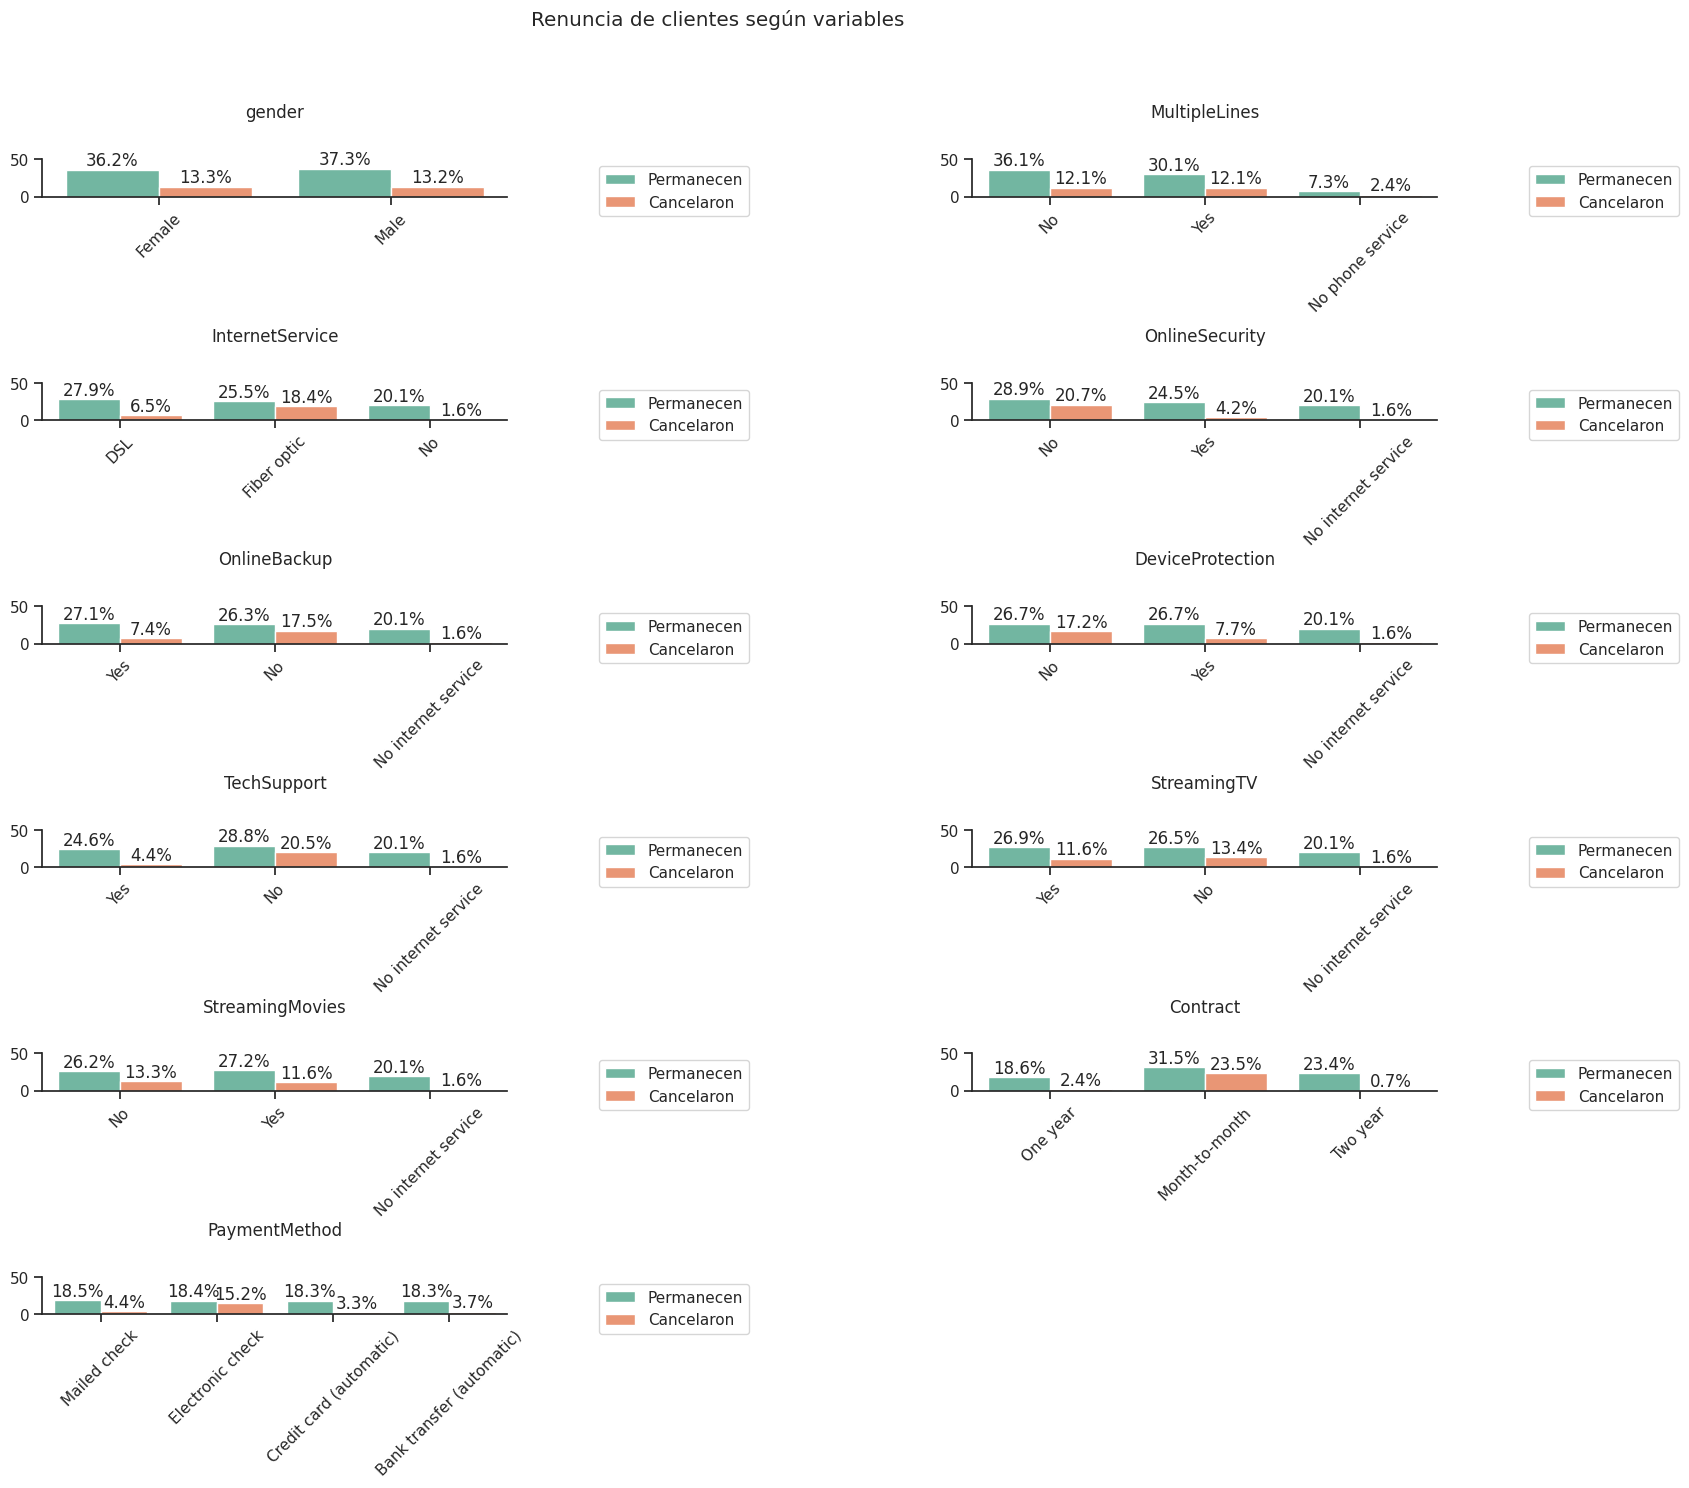

In [148]:
categorias = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',	'OnlineBackup',
                        'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',
                        'PaymentMethod']

fig, axs=plt.subplots(6,2, figsize=(18,15))
fig.subplots_adjust(hspace=5,wspace=1)
fig.suptitle('Renuncia de clientes según variables')
axs=axs.flatten()

for i, var in enumerate(categorias):
  ax=axs[i]
  ax=sns.countplot(data=df_normalizado,x=var,hue='Churn',stat='percent',ax=ax,palette='Set2')
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="ticks", rc=custom_params)
  ax.set_title(f'{var}', pad=30)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_ylim(0,50)
  ax.tick_params(axis='x',rotation=45)
  ax.legend(['Permanecen','Cancelaron'],bbox_to_anchor=(1.18,1.02))

  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

fig.delaxes(axs[-1])

plt.savefig('renuncia_clientes_variables.png', bbox_inches='tight', dpi=300)

plt.show()

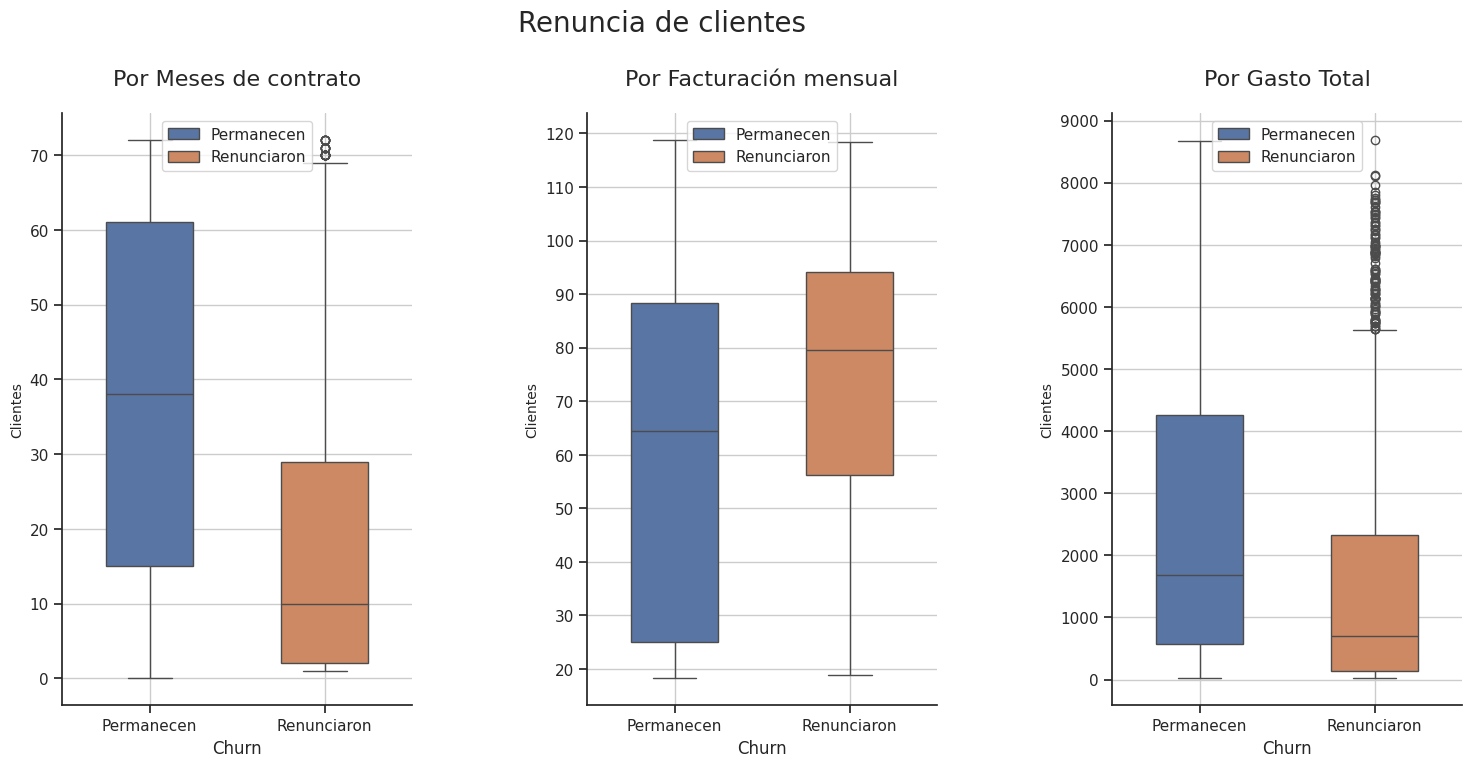

In [149]:
fig, ax = plt.subplots(1,3,figsize=(20,8))
plt.subplots_adjust(top=0.85, left=0.2, wspace=0.5,hspace=1)
fig.suptitle('Renuncia de clientes', fontsize=20,ha='center')

sns.boxplot(data=df_normalizado,y='tenure',x='Churn',hue='Churn',ax=ax[0],orient='v',width=0.5)
ax[0].set_title(f'Por Meses de contrato', loc='center', fontsize=16,pad=20)
ax[0].set_xticks([0,1],labels=['Permanecen','Renunciaron'])
ax[0].set_ylabel('Clientes', fontsize=10)
ax[0].legend(labels=['Permanecen','Renunciaron'],loc='upper center')
ax[0].yaxis.set_major_locator(plt.MultipleLocator(10))
ax[0].grid()

sns.boxplot(data=df_normalizado,y='Charges.Monthly',x='Churn',hue='Churn',ax=ax[1],orient='v',width=0.5)
ax[1].set_title(f'Por Facturación mensual', loc='center', fontsize=16,pad=20)
ax[1].set_xticks([0,1],labels=['Permanecen','Renunciaron'])
ax[1].set_ylabel('Clientes', fontsize=10)
ax[1].legend(labels=['Permanecen','Renunciaron'],loc='upper center')
ax[1].yaxis.set_major_locator(plt.MultipleLocator(10))
ax[1].grid()

sns.boxplot(data=df_normalizado,y='Charges.Total',x='Churn',hue='Churn',ax=ax[2],orient='v',width=0.5)
ax[2].set_title(f'Por Gasto Total', loc='center', fontsize=16,pad=20)
ax[2].set_xticks([0,1],labels=['Permanecen','Renunciaron'])
ax[2].set_ylabel('Clientes', fontsize=10)
ax[2].legend(labels=['Permanecen','Renunciaron'],loc='upper center')
ax[2].yaxis.set_major_locator(plt.MultipleLocator(1000))
ax[2].grid()

plt.savefig('renuncia_clientes_montos.png', bbox_inches='tight', dpi=300)

plt.show()

#📄Informe final

#Telecom X: Análisis de evasión de clientes

## 1. Introducción
Telecom X es una empresa de telecomunicaciones donde hemos sido contratados como analistas de datos para trabajar en un proyecto específico de renuncia de clientes.\
La empresa está enfrentando un alto índice de renuncia de clientes y aún no han identificado el problema de esta renuncia. Para ello, nos han proporcionado algunos datos para buscar, tratar y realizar un análisis exploratorio. De esta manera, podremos realizar un análisis predictivo y determinar de dónde proviene esta renuncia de clientes.

## 2. Metodología
Para la realización del análisis exploratorio en base a los datos proporcionados, contamos con los siguientes pasos a seguir:
* Importación de datos
* Limpieza y normalización
* Análisis Exploratorio
* Visualización gráfica de patrones y tendencias
* Elaboración de informe final con análisis y recomendaciones

## 3. Desarrollo
### Renuncia de clientes
Los gráficos indican la la cantidad de clientes que a la fecha han renunciado a los servicios de la empresa. Porcentualmente se a producido una renuncia correspondiente al 26,5% del total de los clientes.
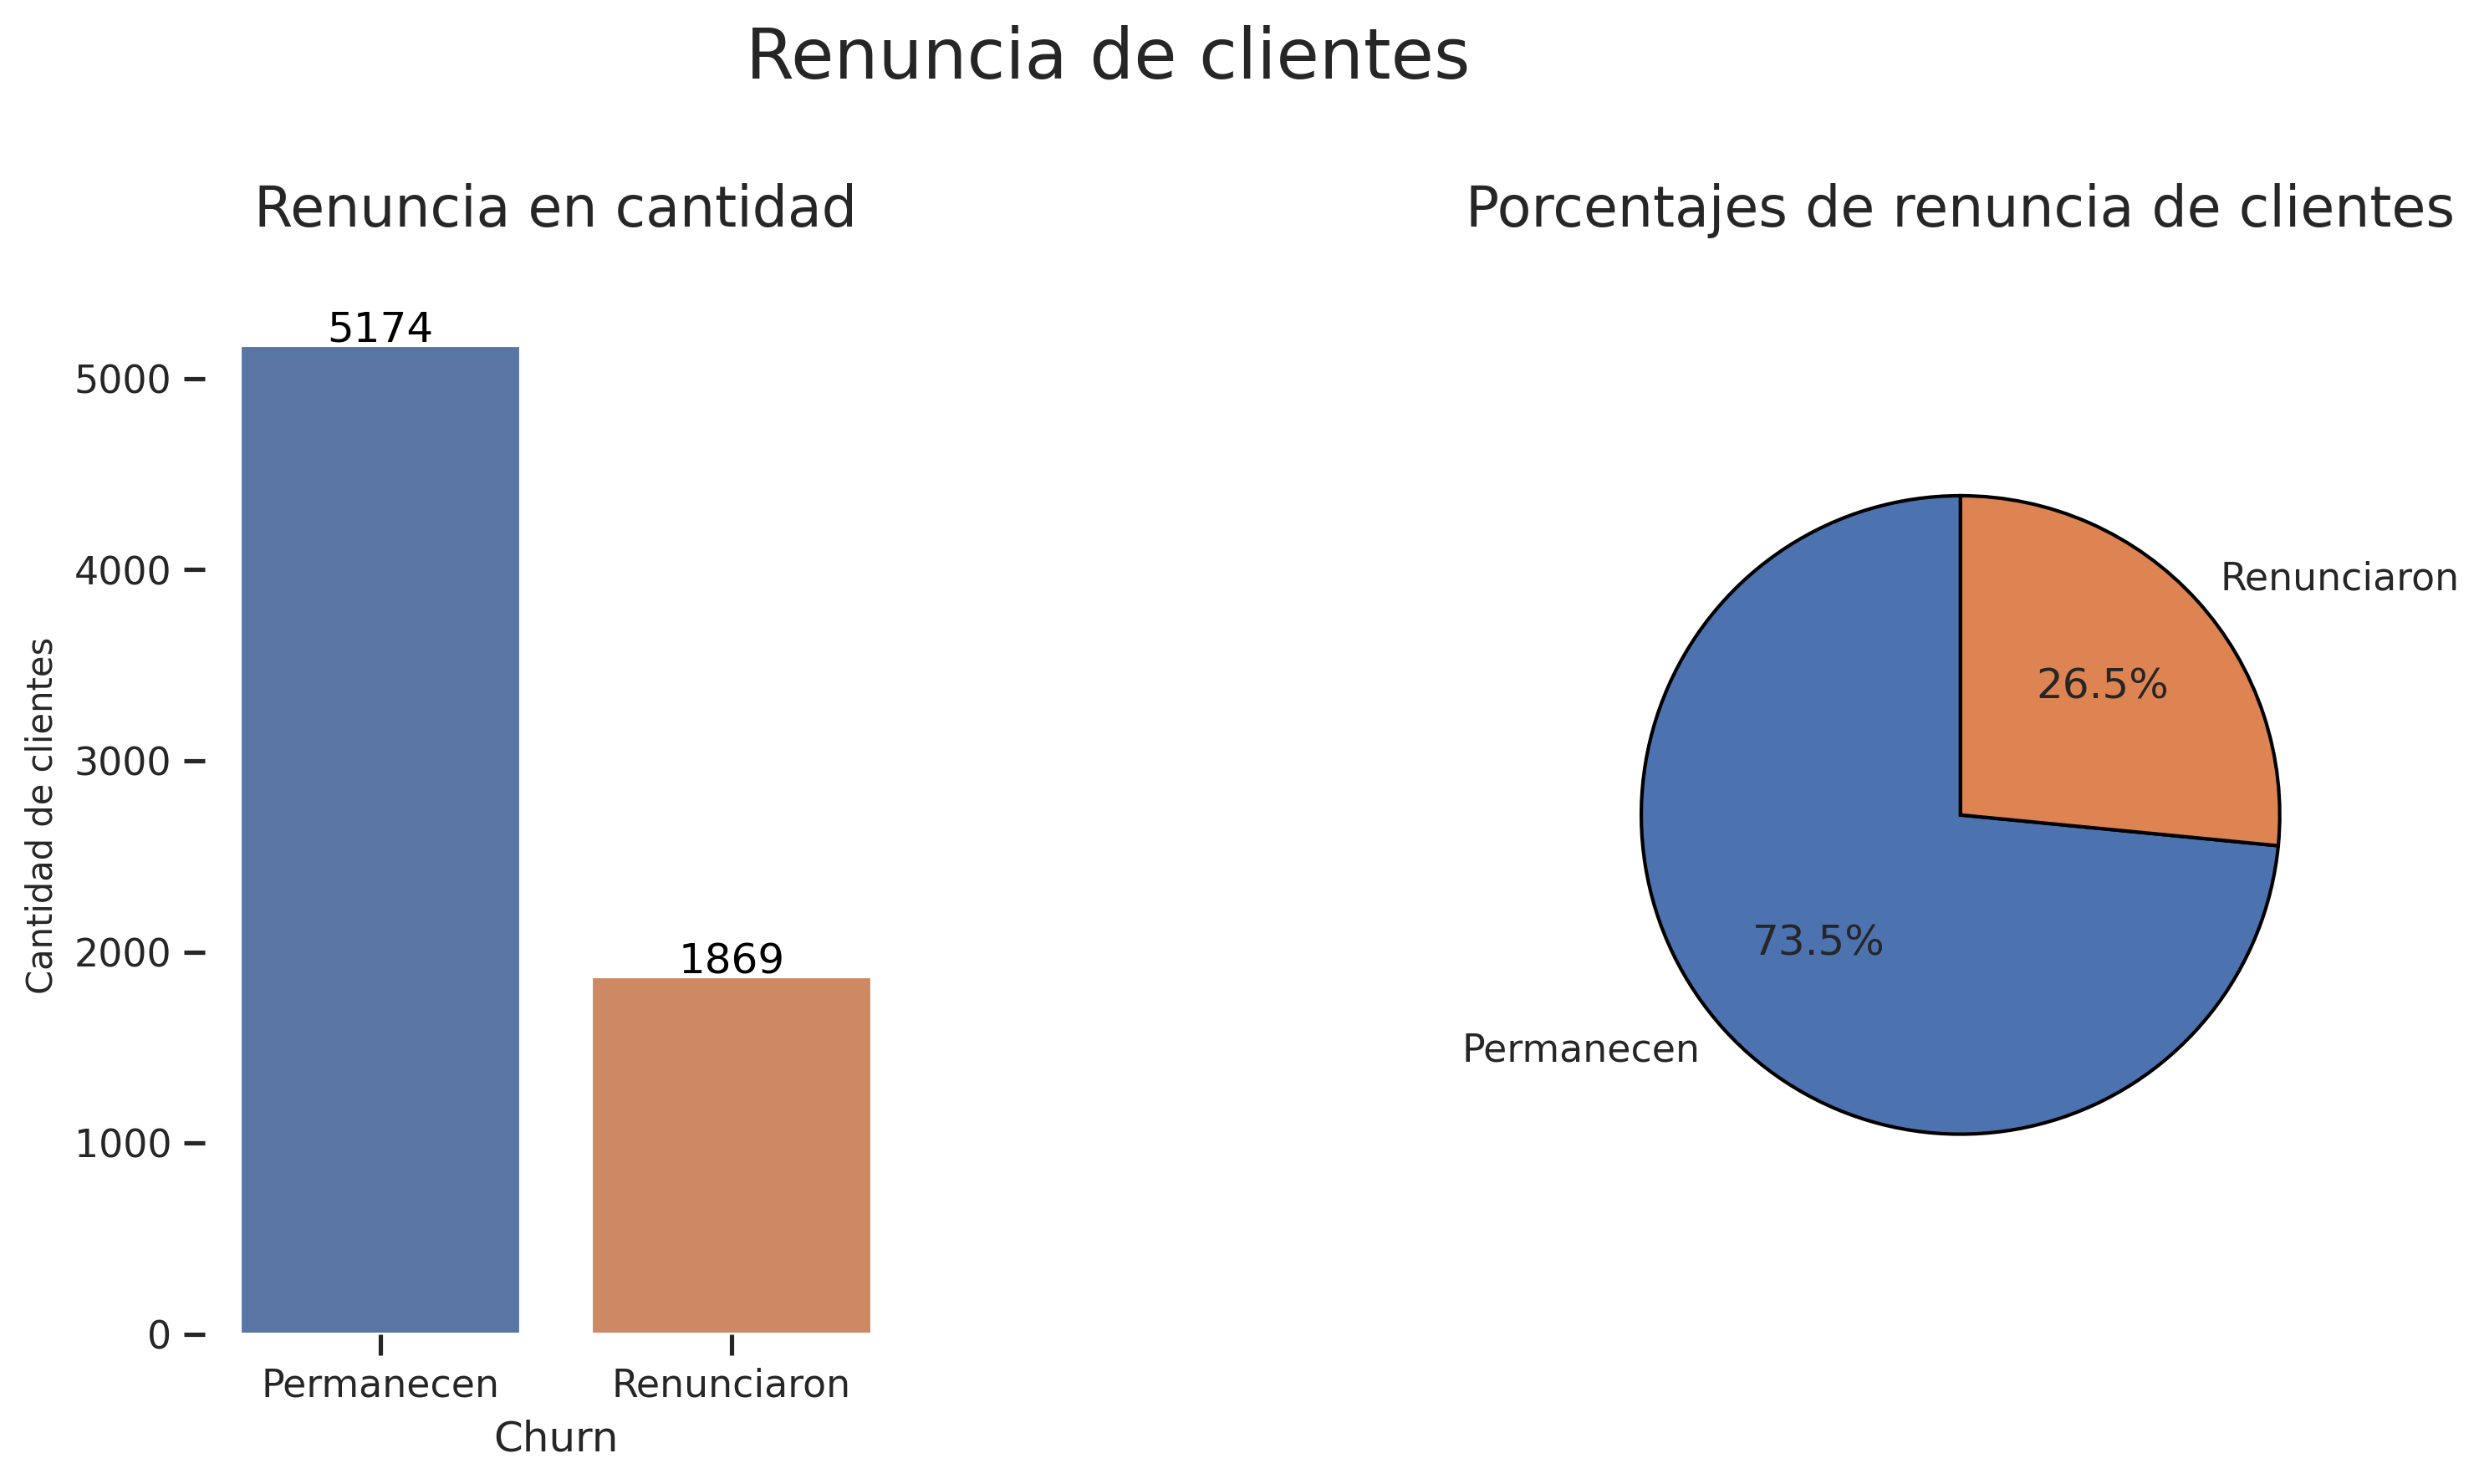

### Incidencia de las variables